In [20]:
import numpy as np
import seaborn as sns

# Data Generation

In [83]:
dt = 0.001
t = np.arange(0,1,dt)
n = len(t)
f_clean = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f = f_clean + 2.5*np.random.randn(len(t))

# FFT

In [81]:
fhat = np.fft.fft(f) # FFT result
psd = np.real(fhat*np.conj(fhat)/n) # real-valued "magnitude" of the fft result
freq = (1/(dt*n)) * np.arange(n) # frequency
# we can only analize the freq up to freq[:n/2]

Text(0.5, 1.0, 'PSD x Frequency')

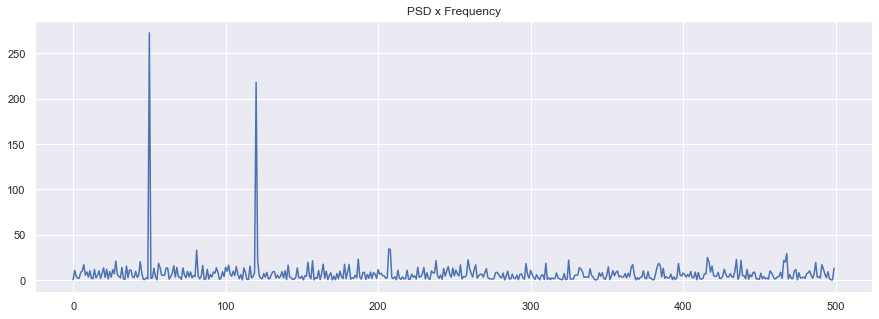

In [85]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.lineplot(x=freq[:n//2], y=psd[:n//2]).set_title("PSD x Frequency")

In [111]:
# high pass filter
mask = psd>100

fhat_filtered = fhat*mask

f_filtered = np.fft.ifft(fhat_filtered)
f_filtered = np.real(f_filtered)

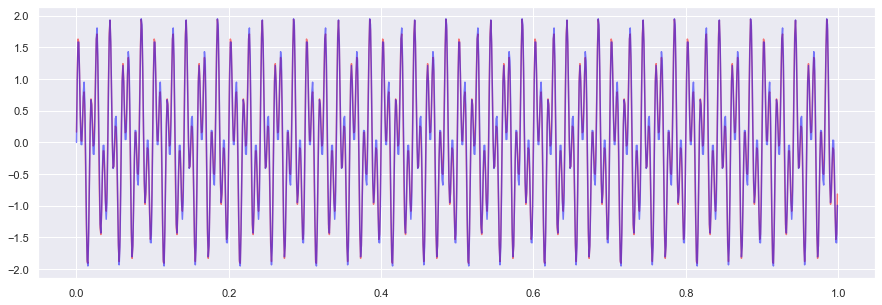

In [118]:
# f_filtered and f_clean are pretty much the same signal
sns.lineplot(x=t, y=f_filtered, color='red', alpha=0.5)
sns.lineplot(x=t, y=f_clean, color='blue', alpha=0.5)

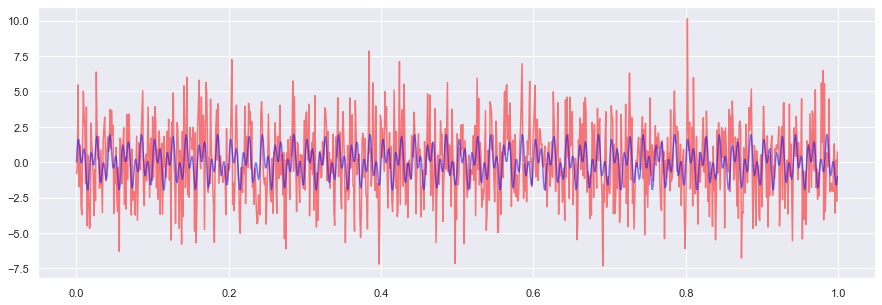

In [119]:
# while f (noisy) and f_clean are very different
sns.lineplot(x=t, y=f, color='red', alpha=0.5)
sns.lineplot(x=t, y=f_clean, color='blue', alpha=0.5)